<a href="https://colab.research.google.com/github/Thammawit/Dataset1/blob/master/Solution_Moving_Average.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
url ='https://raw.githubusercontent.com/Thammawit/Dataset1/master/coco%20price.csv'
df = pd.read_csv(url) #,names=['Time','Price']) 
df

,Time,Price
0,01-01-90,232
1,01-02-90,244
2,01-03-90,249
3,01-04-90,254
4,01-05-90,243
...,...,...
350,01-03-19,681
351,01-04-19,708
352,01-05-19,716
353,01-06-19,641


In [ ]:
df['Price'] = df['Price']/100
df

,Time,Price
0,01-01-90,2.32
1,01-02-90,2.44
2,01-03-90,2.49
3,01-04-90,2.54
4,01-05-90,2.43
...,...,...
350,01-03-19,6.81
351,01-04-19,7.08
352,01-05-19,7.16
353,01-06-19,6.41


In [ ]:
df.set_index('Time',inplace=True)
df

,Price
Time,
01-01-90,2.32
01-02-90,2.44
01-03-90,2.49
01-04-90,2.54
01-05-90,2.43
...,...
01-03-19,6.81
01-04-19,7.08
01-05-19,7.16


Text(0, 0.5, 'Price (Bath/Piece)')

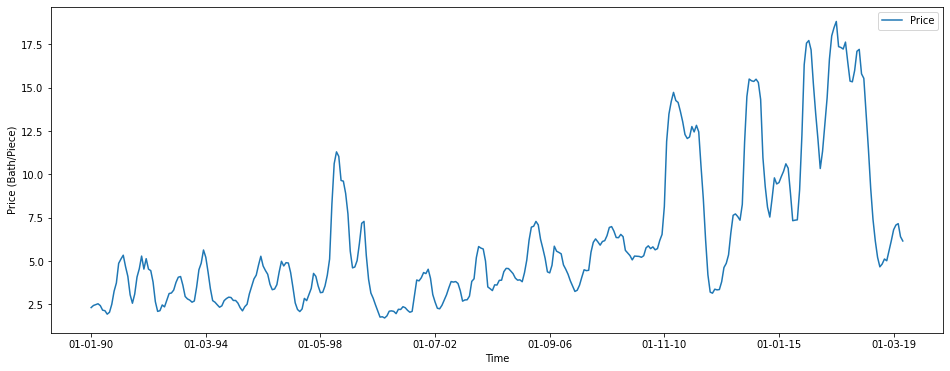

In [ ]:
ax = df.plot(figsize=(16,6))
ax.set_ylabel('Price (Bath/Piece)')

In [ ]:
sma = df.rolling(window=3).mean()
df['SMA'] = sma.shift(1)
df

,Price,SMA
Time,,
01-01-90,2.32,NaN
01-02-90,2.44,NaN
01-03-90,2.49,NaN
01-04-90,2.54,2.416667
01-05-90,2.43,2.490000
...,...,...
01-03-19,6.81,5.596667
01-04-19,7.08,6.193333
01-05-19,7.16,6.690000


In [ ]:
expo = df['Price'].shift(1).ewm(alpha=0.5,adjust=False).mean()
df['Expo']=expo
df

,Price,SMA,Expo
Time,,,
01-01-90,2.32,NaN,NaN
01-02-90,2.44,NaN,2.320000
01-03-90,2.49,NaN,2.380000
01-04-90,2.54,2.416667,2.435000
01-05-90,2.43,2.490000,2.487500
...,...,...,...
01-03-19,6.81,5.596667,5.760044
01-04-19,7.08,6.193333,6.285022
01-05-19,7.16,6.690000,6.682511


Text(0, 0.5, 'Price (Bath/Piece)')

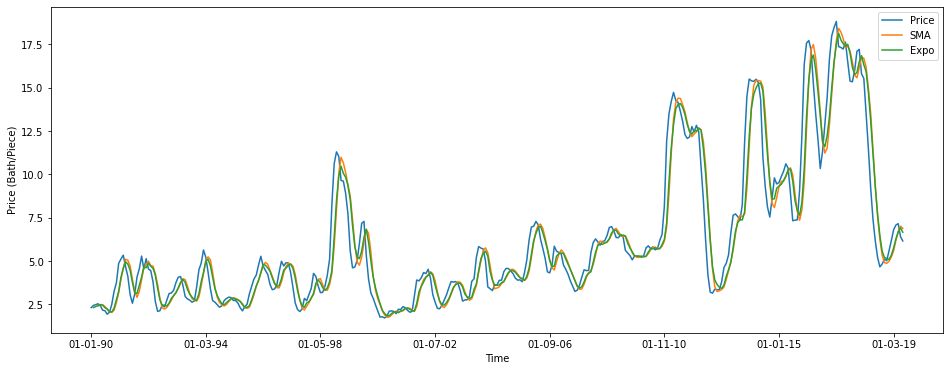

In [ ]:
ax = df.plot(figsize=(16,6))
ax.set_ylabel('Price (Bath/Piece)')


In [ ]:
df.describe()

,Price,SMA,Expo
count,355.000000,352.000000,354.000000
mean,6.179183,6.188722,6.166962
std,4.150998,4.111059,4.055877
min,1.720000,1.760000,1.843970
25%,3.310000,3.388333,3.443124
50%,4.720000,4.743333,4.688309
75%,7.290000,7.179167,7.050428
max,18.820000,18.423333,18.146417


In [ ]:
df = df.dropna()
Y_true=df['Price'].values
Y_pred_Expo=df['Expo'].values
Y_pred_SMA=df['SMA'].values
df

,Price,SMA,Expo
Time,,,
01-04-90,2.54,2.416667,2.435000
01-05-90,2.43,2.490000,2.487500
01-06-90,2.17,2.486667,2.458750
01-07-90,2.14,2.380000,2.314375
01-08-90,1.94,2.246667,2.227188
...,...,...,...
01-03-19,6.81,5.596667,5.760044
01-04-19,7.08,6.193333,6.285022
01-05-19,7.16,6.690000,6.682511


In [ ]:
#RMSE
print("RMSE_SMA = ", np.sqrt(np.mean(np.square(Y_true-Y_pred_SMA))))
print("RMSE_Expo = ", np.sqrt(np.mean(np.square(Y_true-Y_pred_Expo))))

RMSE_SMA =  1.4721589335071978
RMSE_Expo =  1.321837603913945


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
print("MAPE_SMA = ",mean_absolute_percentage_error(Y_true,Y_pred_SMA))
print("MAPE_Expo = ",mean_absolute_percentage_error(Y_true,Y_pred_Expo))

MAPE_SMA =  0.1724206324229518
MAPE_Expo =  0.1550181722695195
